In [6]:
import numpy as np
import time
import pandas as pd
from scipy.sparse import csr_matrix
from netreco import Reconstructor, ss_sim
from netreco.Reconstructor import Profile
import matplotlib.pyplot as plt

# R = 200
bounds = 10
order = 4
n = 6

Preparing for an Unmeasured Reconstruction ...
	Done. Took 0.000 Seconds
Building LQ ...
	Done. Took 0.003 Seconds
Building M ...
	Done. Took 0.005 Seconds
Building yhat ...
	Done. Took 0.000 Seconds
Running Least Squares to get xhat ...
	Finished lsq: Error = 0.032
	Done. Took 0.027 Seconds
Extracting Qis ...
	Done. Took 0.001 Seconds
Learning Convolution for Q(1,2) ...
	Q(1,2) Carolina Cruz Osorio <-- Barack Obama: -3.574*(-0.321)^t + -9.793*(0.060)^t + 9.900*(-0.127)^t + 2.942*(0.232)^t + 0.525312 * delta(t,0)
		RMSE = 0.004
		Matlab: [-3.57 -0.32 -9.79  0.06  9.9  -0.13  2.94  0.23]
	Done. Took 10.170 Seconds
Learning Convolution for Q(1,3) ...
	Q(1,3) Carolina Cruz Osorio <-- Donald J. Trump: 1.966*(0.191)^t + 3.925*(0.381)^t + -3.955*(-0.121)^t + -5.341*(0.335)^t + 3.405716 * delta(t,0)
		RMSE = 0.102
		Matlab: [ 1.97  0.19  3.92  0.38 -3.96 -0.12 -5.34  0.34]
	Done. Took 1.647 Seconds
Learning Convolution for Q(1,4) ...
	Q(1,4) Carolina Cruz Osorio <-- Amitabh Bachchan: -6.584*(

/home/nwoodbury/.virtualenvs/netreco/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


	Q(5,1) Ana Hickmann <-- Carolina Cruz Osorio: 4.823*(-0.128)^t + 9.748*(0.312)^t + 9.730*(-0.128)^t + 9.256*(-0.128)^t + -33.556885 * delta(t,0)
		RMSE = 0.120
		Matlab: [ 4.82 -0.13  9.75  0.31  9.73 -0.13  9.26 -0.13]
	Done. Took 2.612 Seconds
Learning Convolution for Q(5,2) ...
	Q(5,2) Ana Hickmann <-- Barack Obama: 9.450*(-0.204)^t + -1.396*(-0.334)^t + -5.032*(-0.051)^t + -3.608*(-0.333)^t + 0.585823 * delta(t,0)
		RMSE = 0.020
		Matlab: [ 9.45 -0.2  -1.4  -0.33 -5.03 -0.05 -3.61 -0.33]
	Done. Took 9.594 Seconds
Learning Convolution for Q(5,3) ...
	Q(5,3) Ana Hickmann <-- Donald J. Trump: 10.000*(0.094)^t + -10.000*(-0.097)^t + -10.000*(-0.097)^t + -10.000*(0.261)^t + 20.000000 * delta(t,0)
		RMSE = 0.150
		Matlab: [ 10.     0.09 -10.    -0.1  -10.    -0.1  -10.     0.26]
	Done. Took 3.000 Seconds
Learning Convolution for Q(5,4) ...
	Q(5,4) Ana Hickmann <-- Amitabh Bachchan: -0.187*(-0.774)^t + -10.000*(0.245)^t + 7.586*(0.149)^t + 7.515*(0.152)^t + -4.914474 * delta(t,0)
		RMSE 

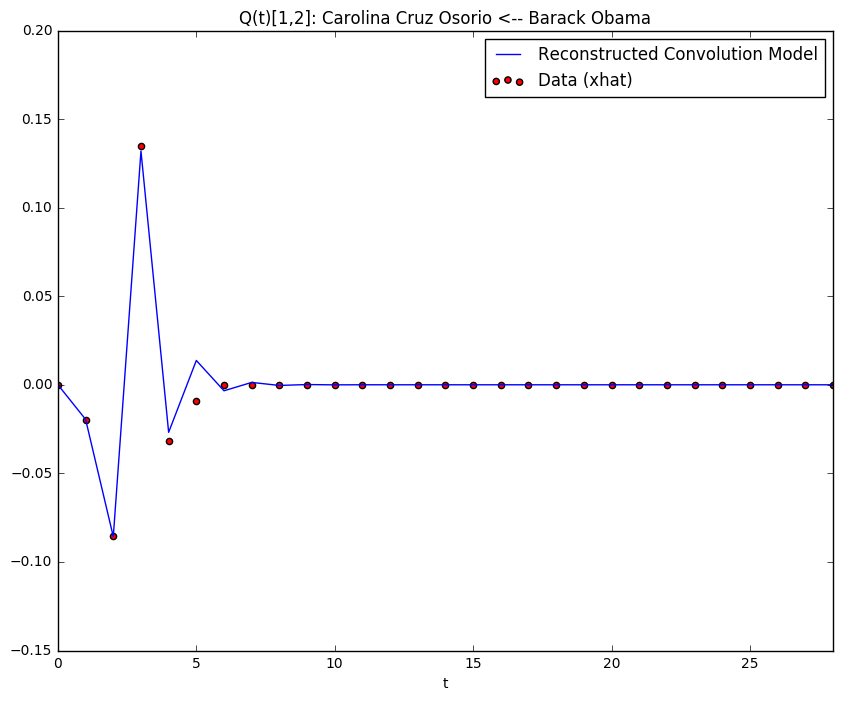

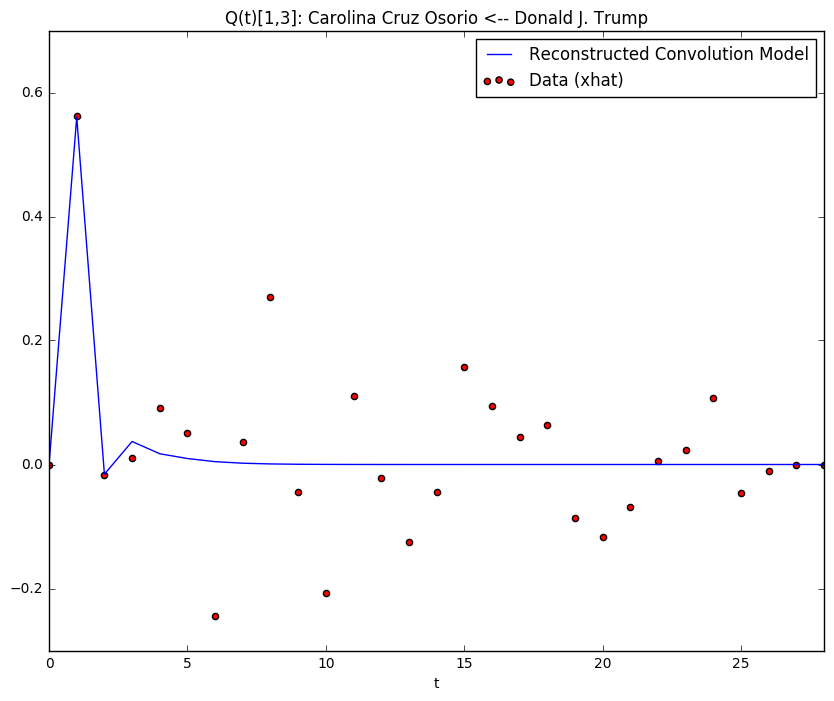

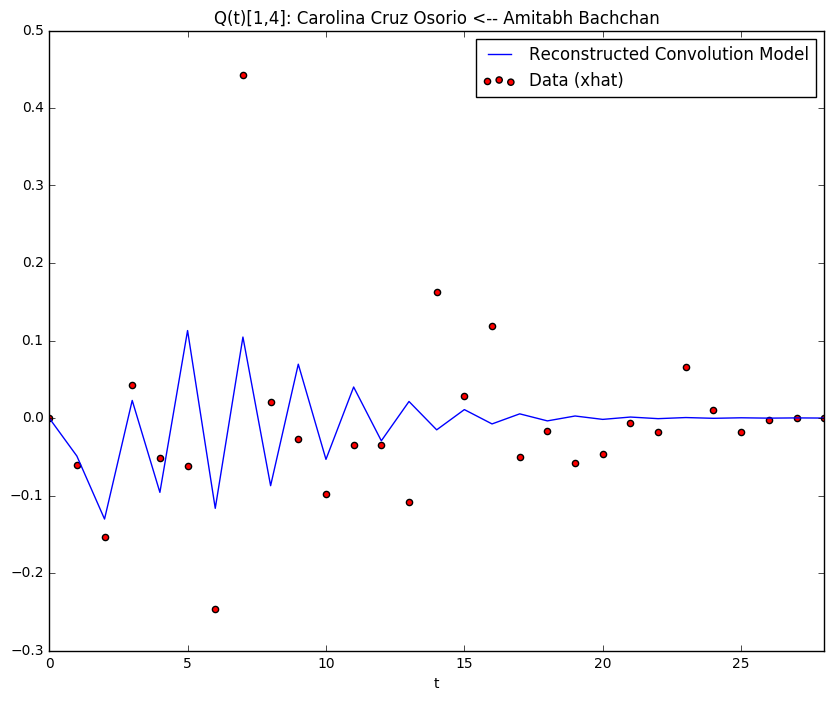

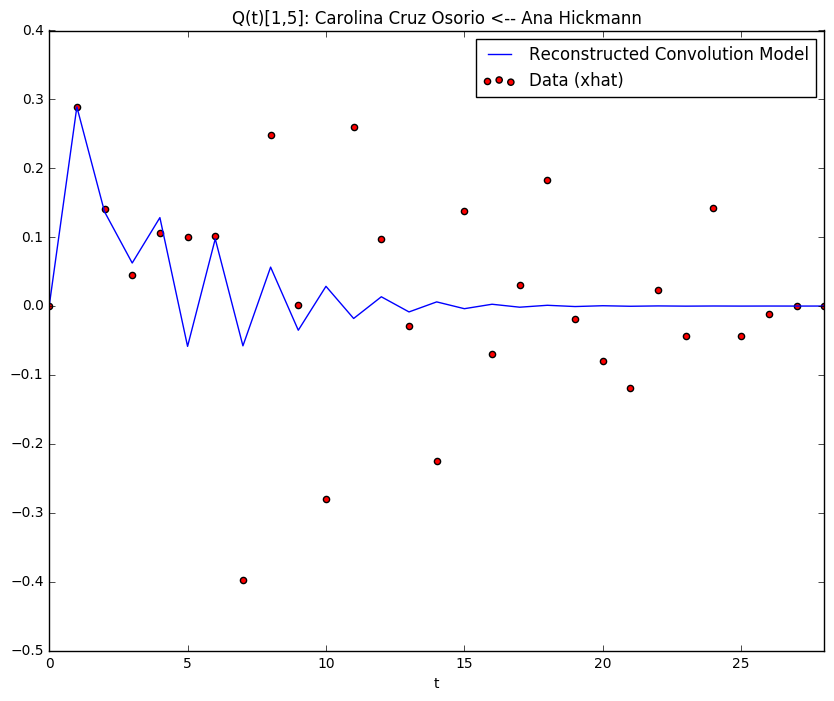

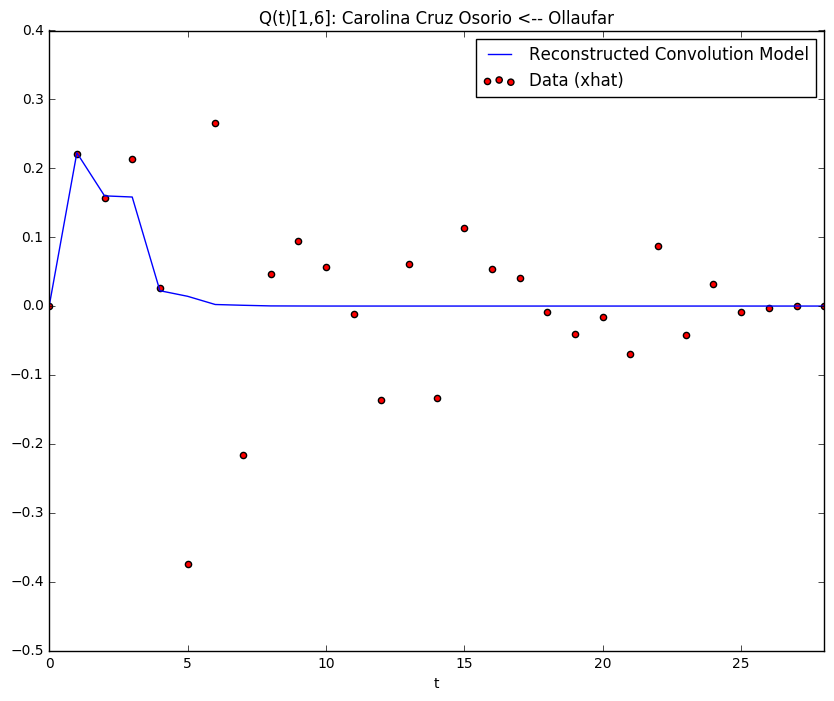

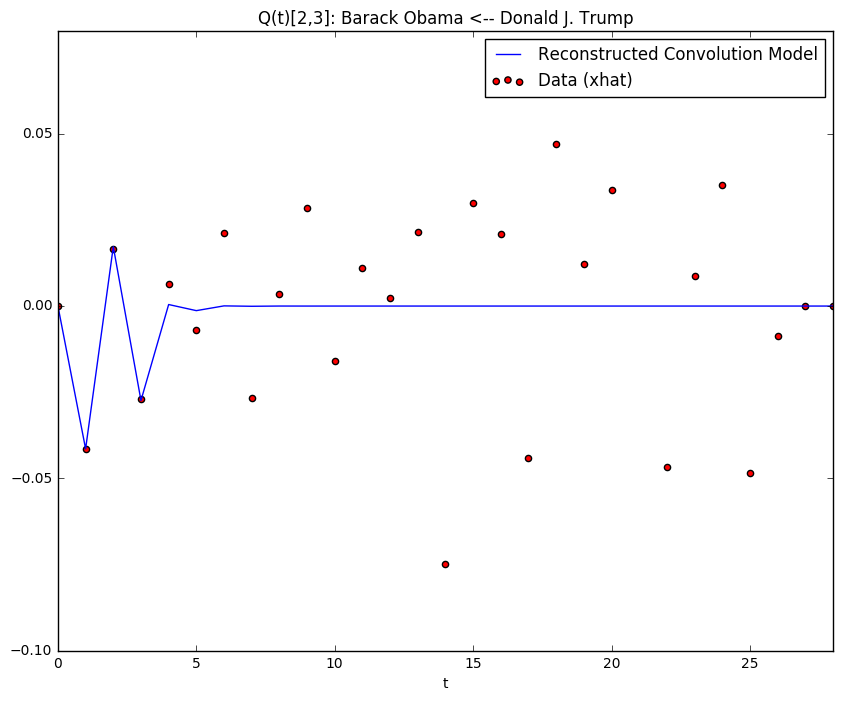

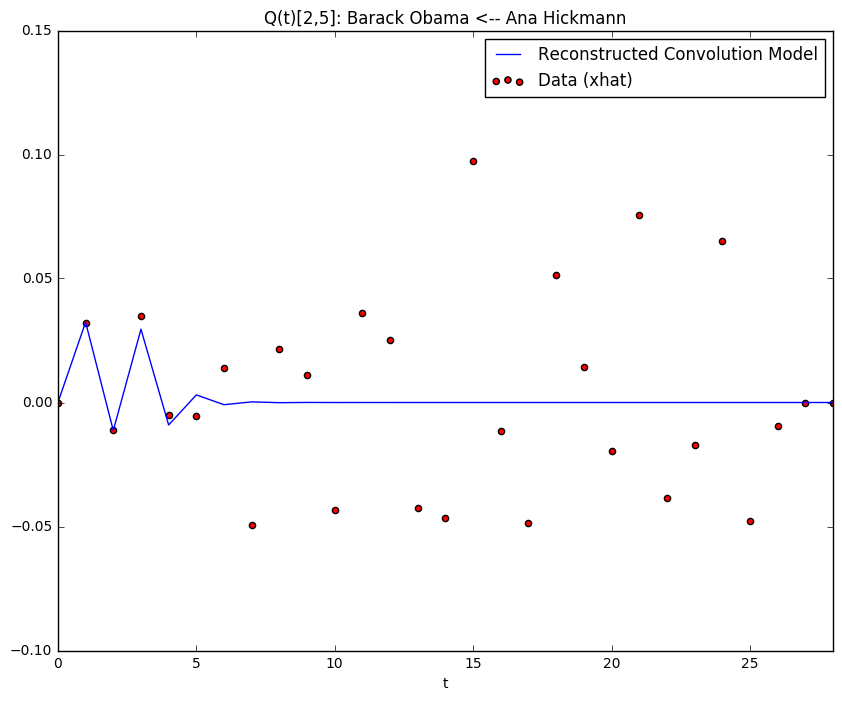

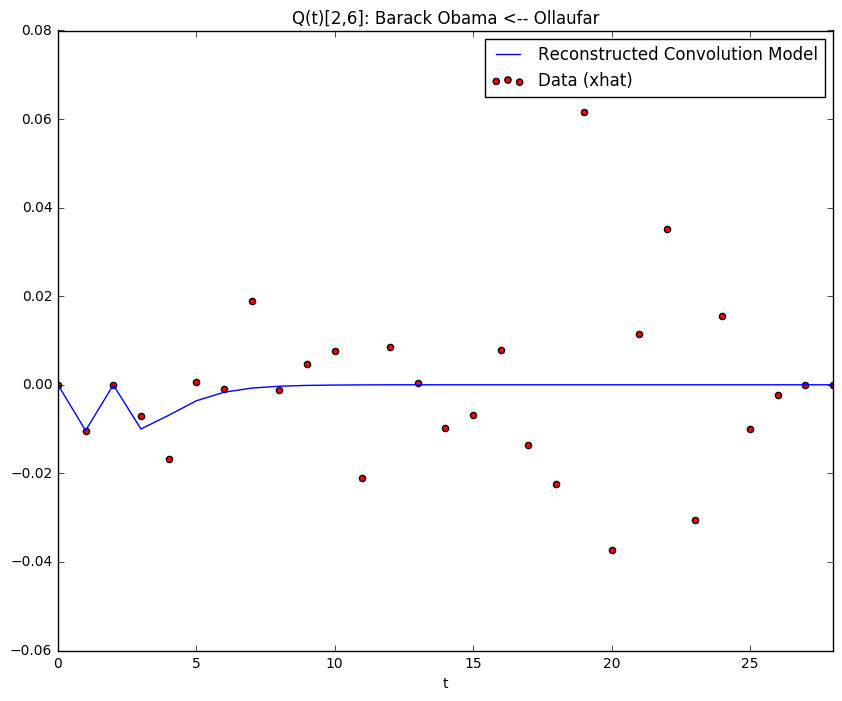

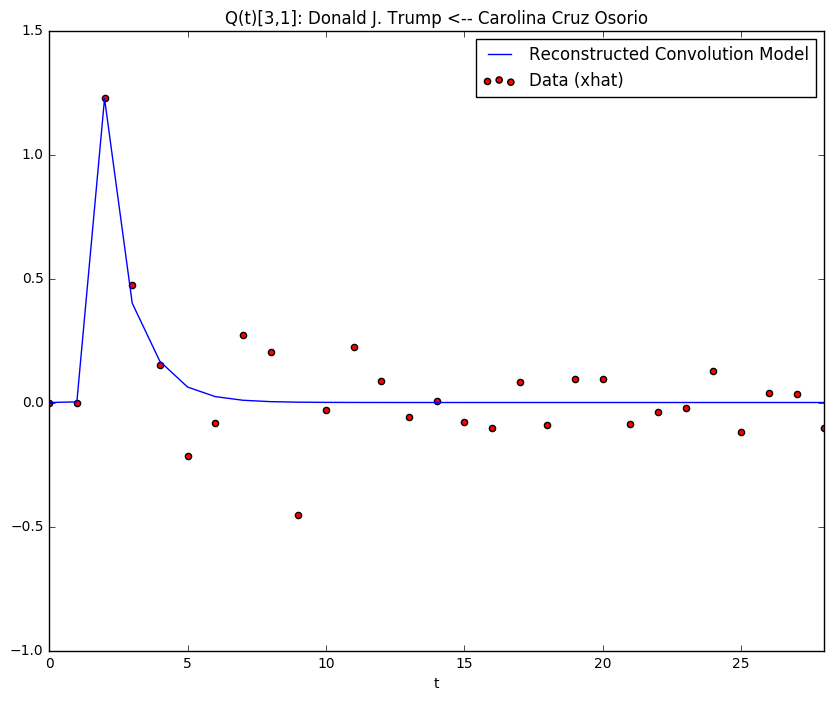

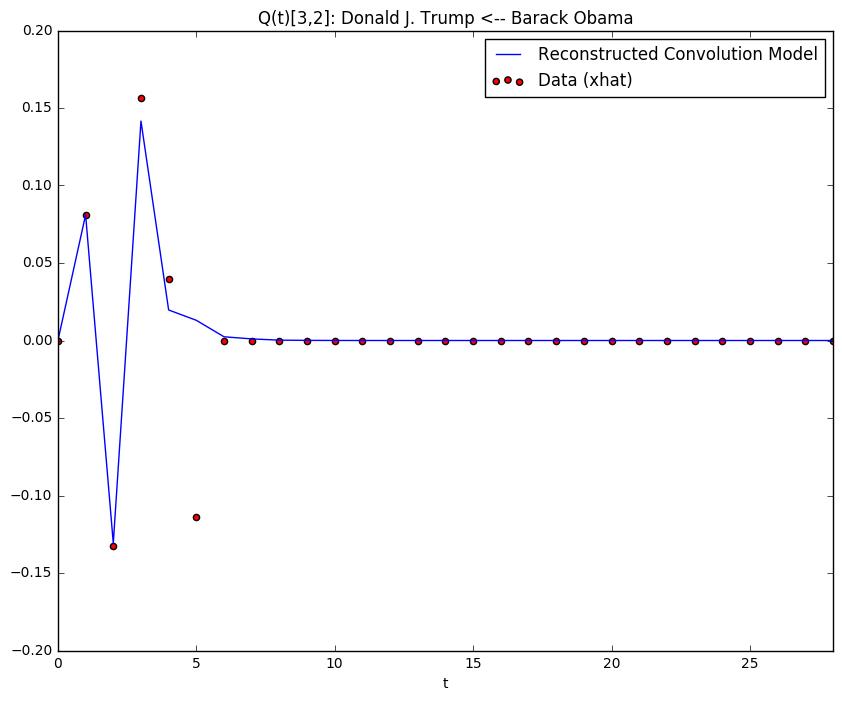

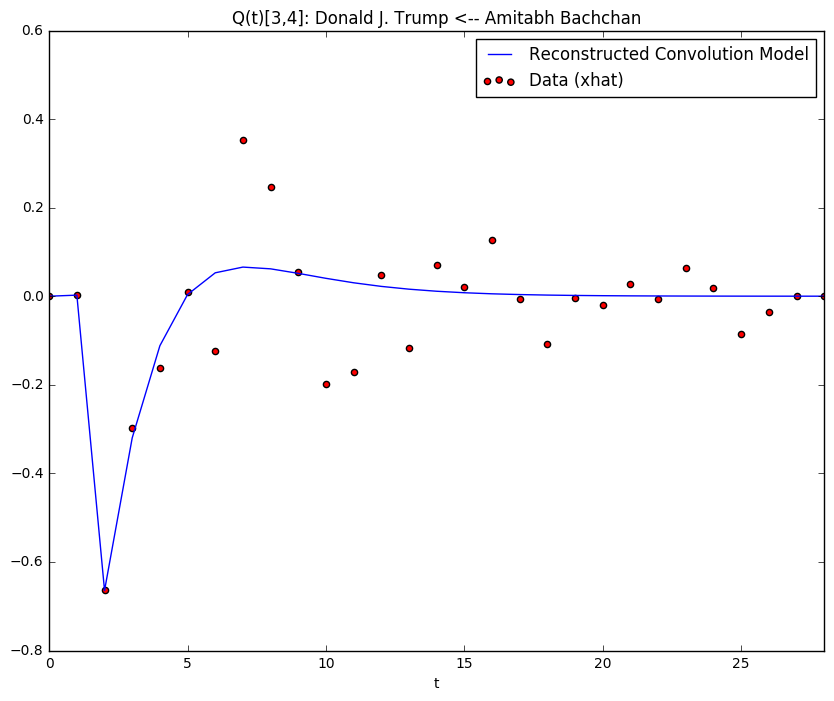

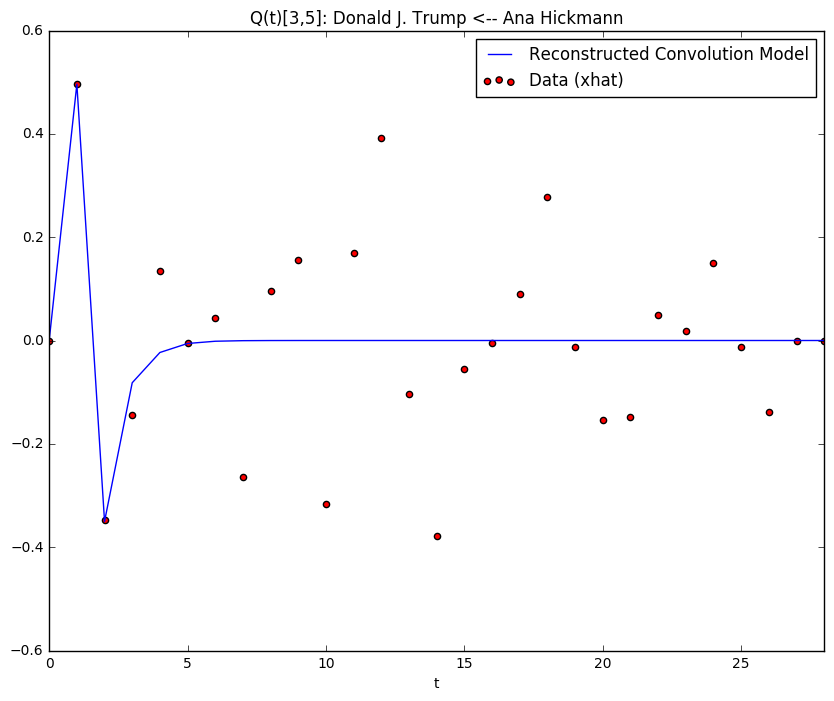

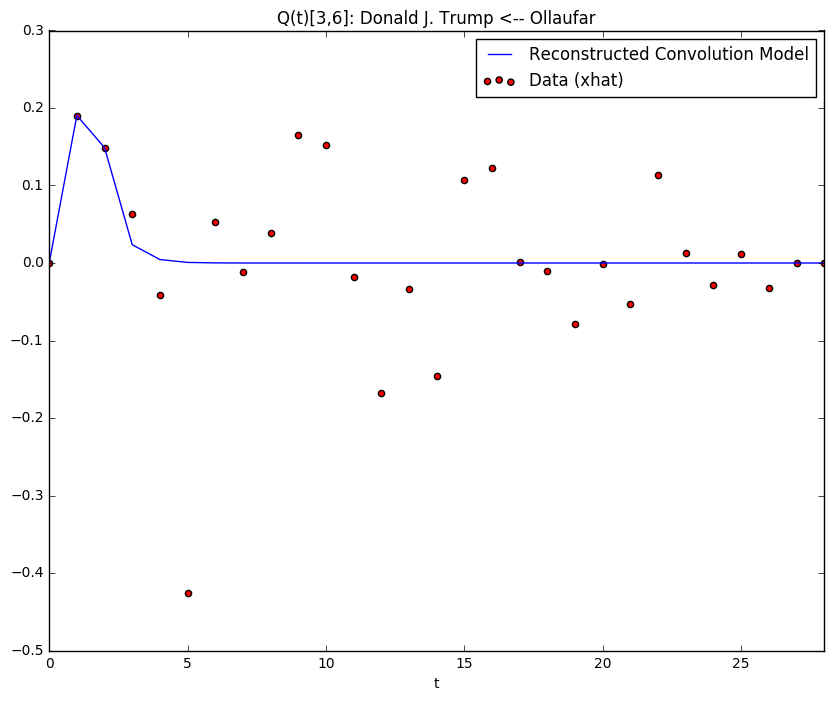

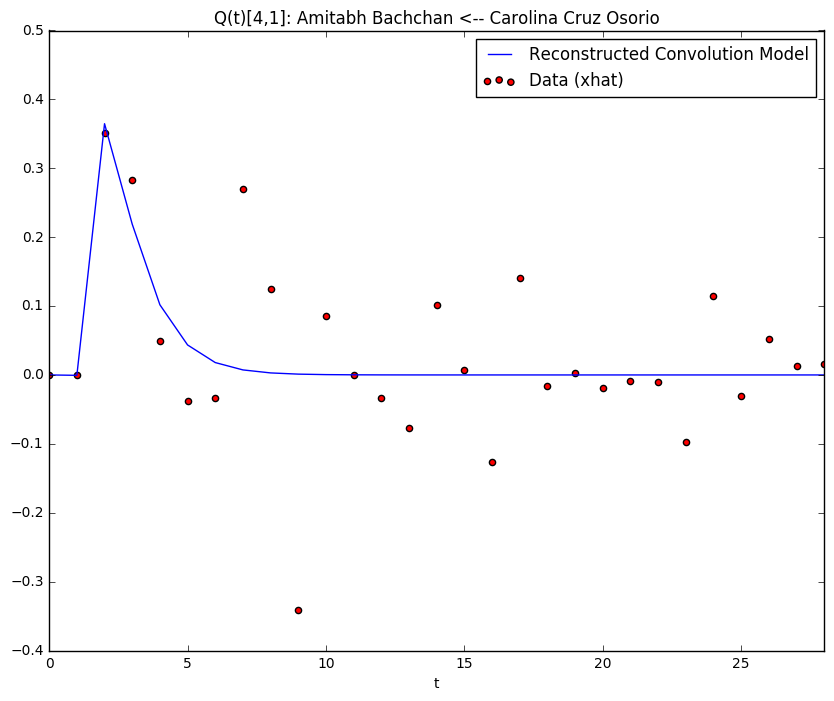

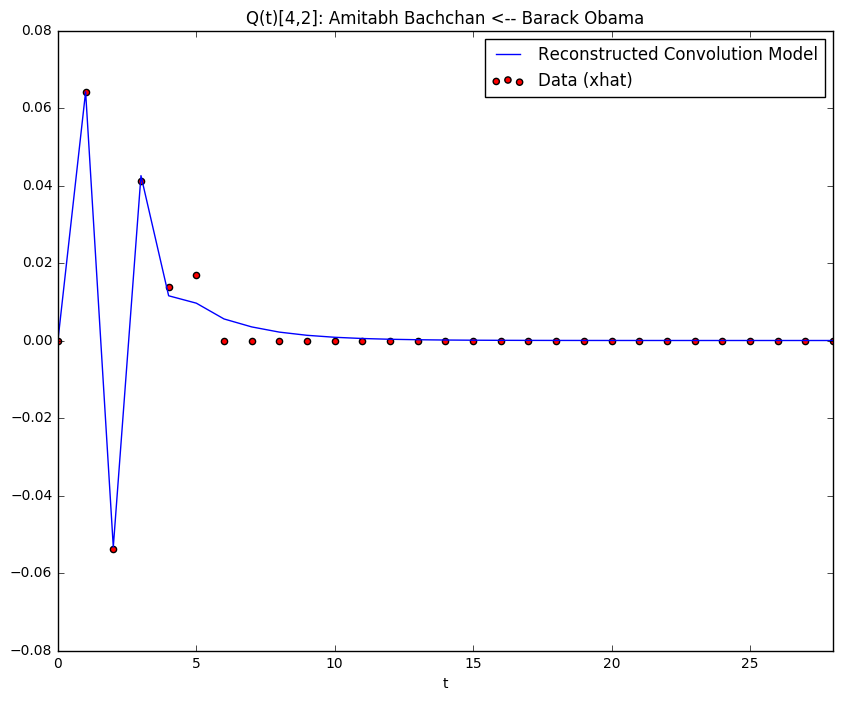

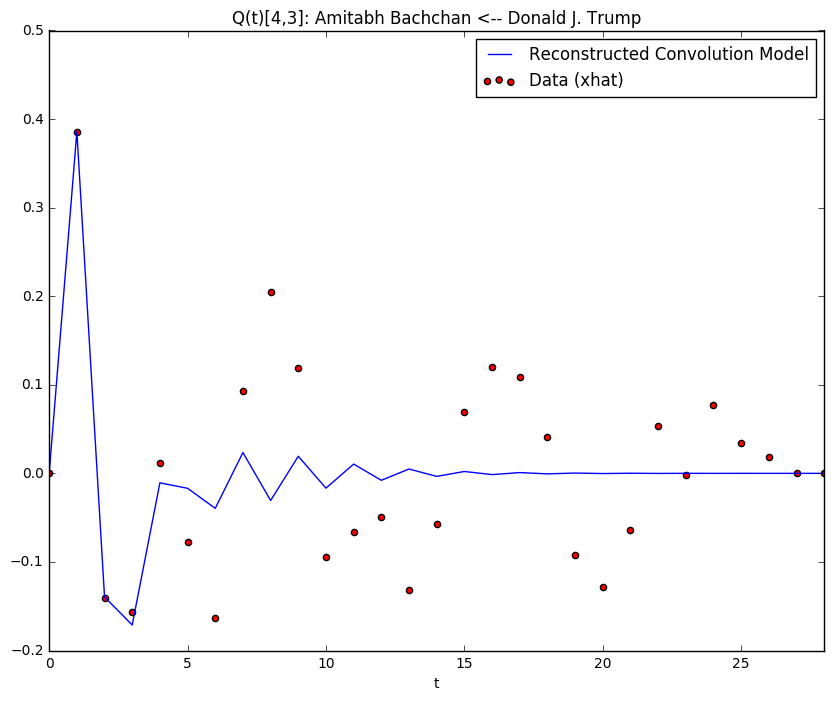

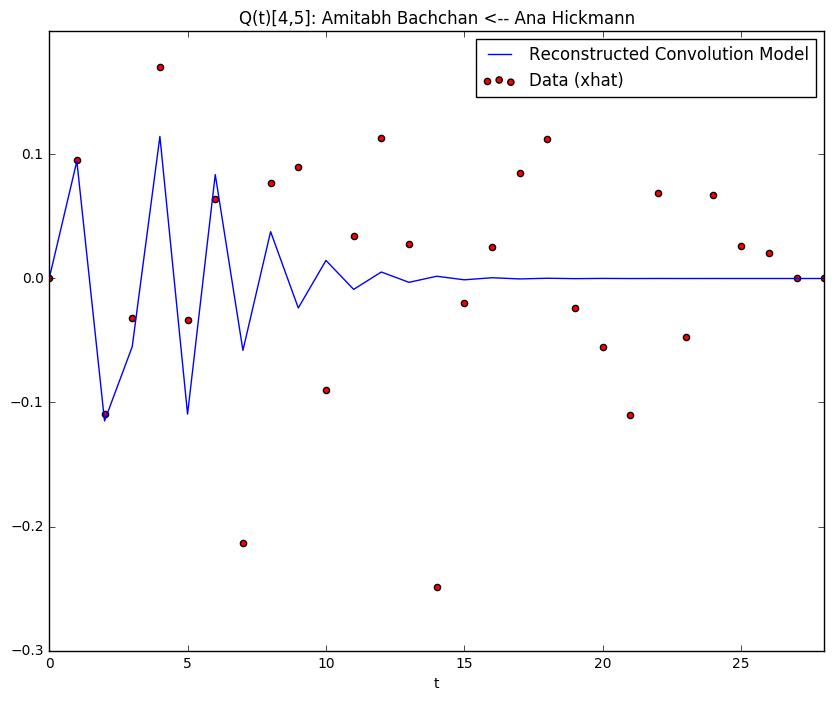

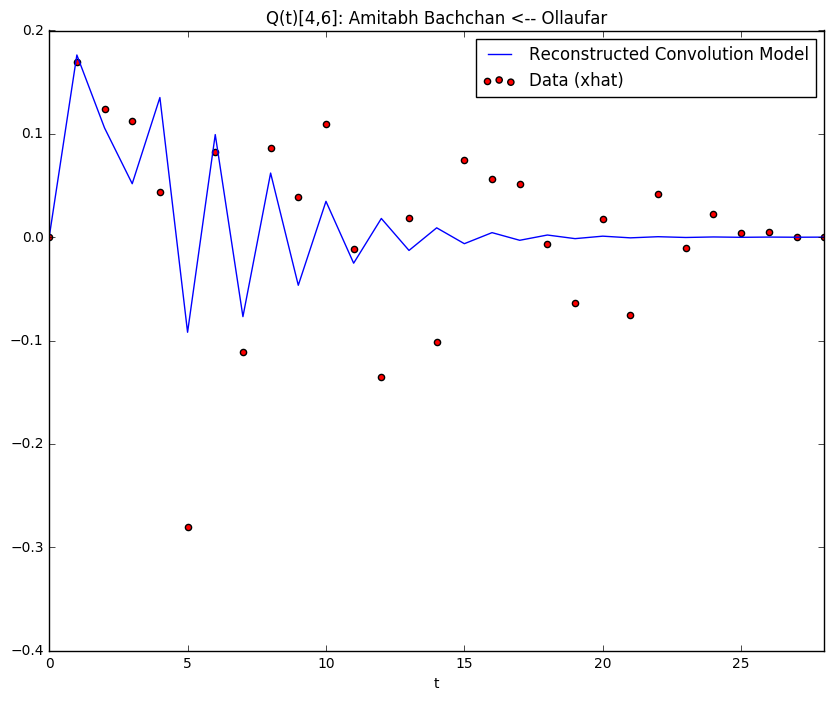

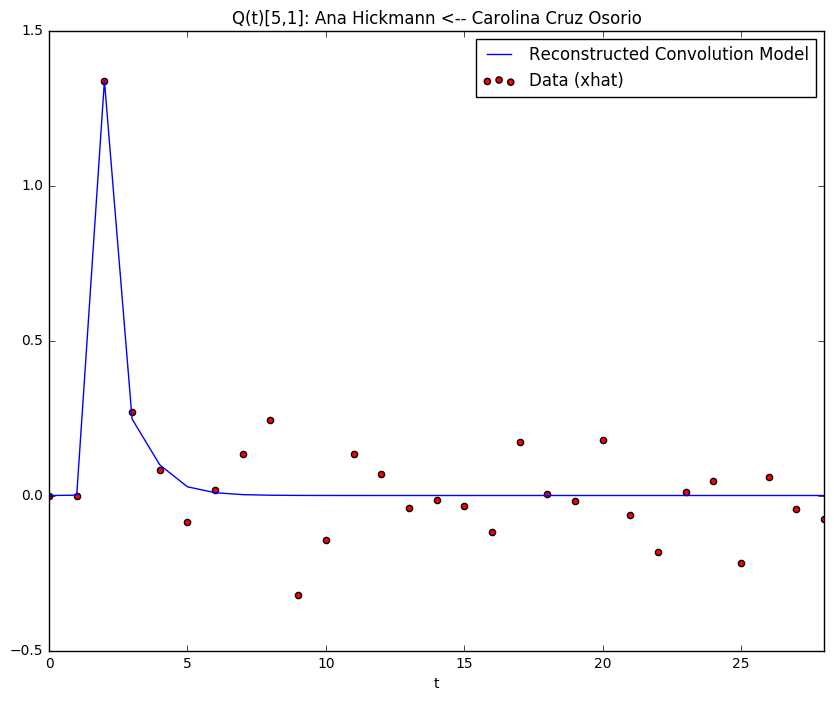

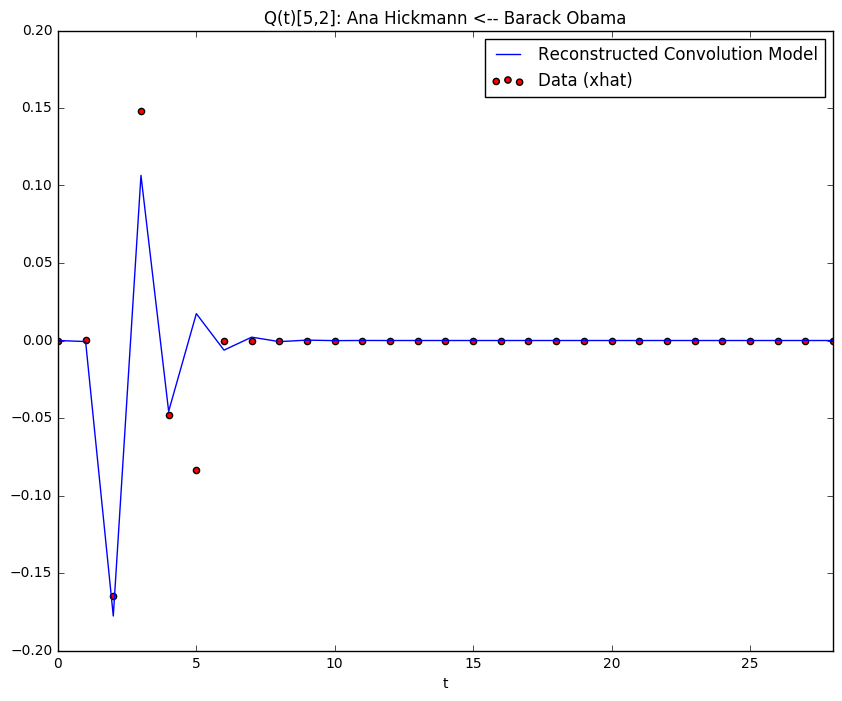

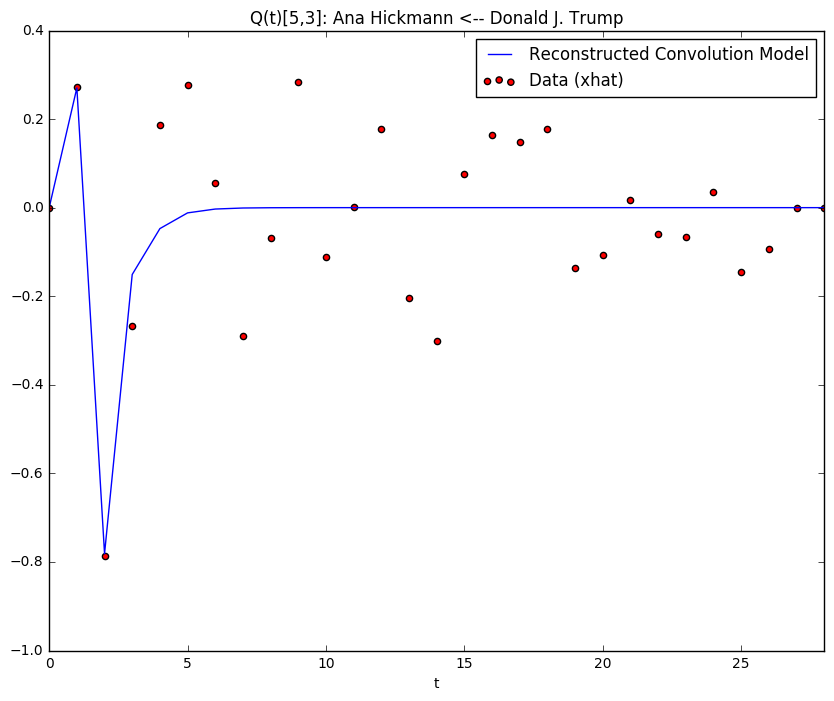

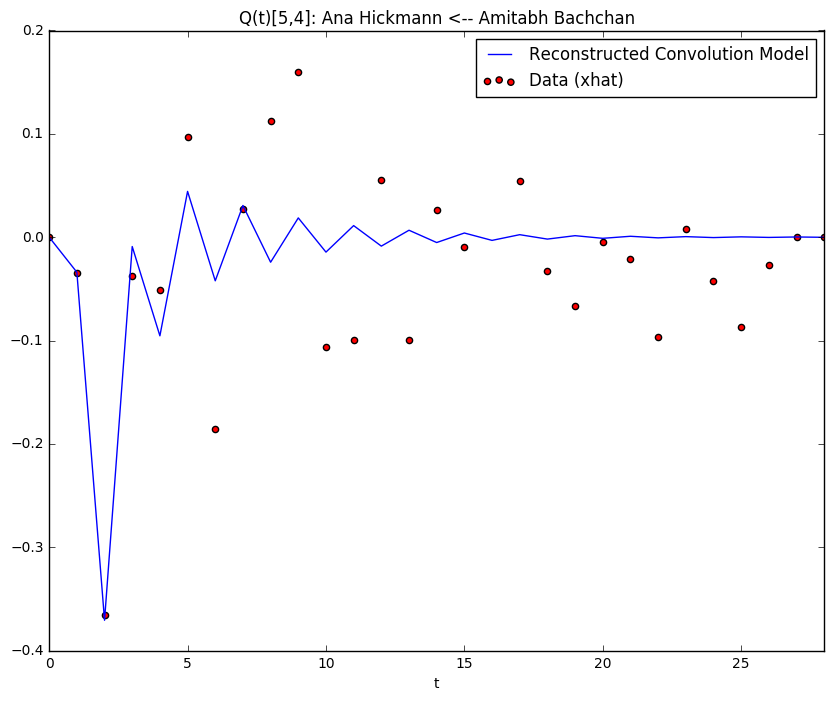

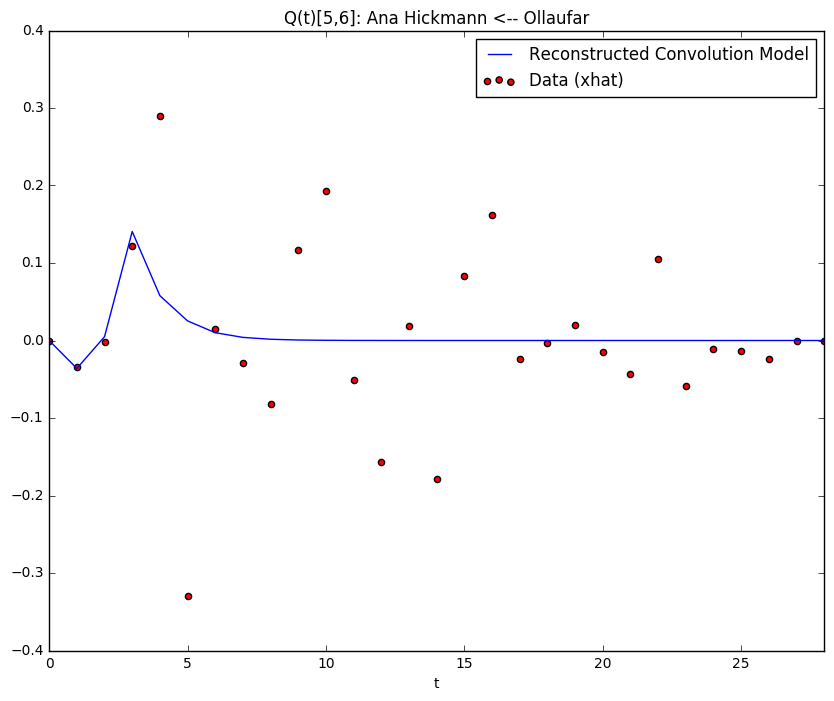

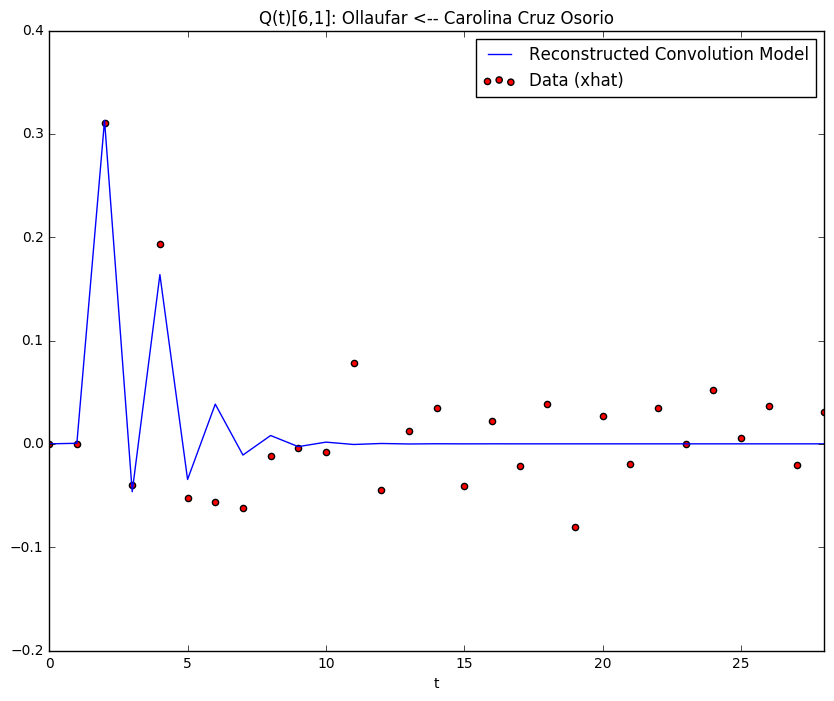

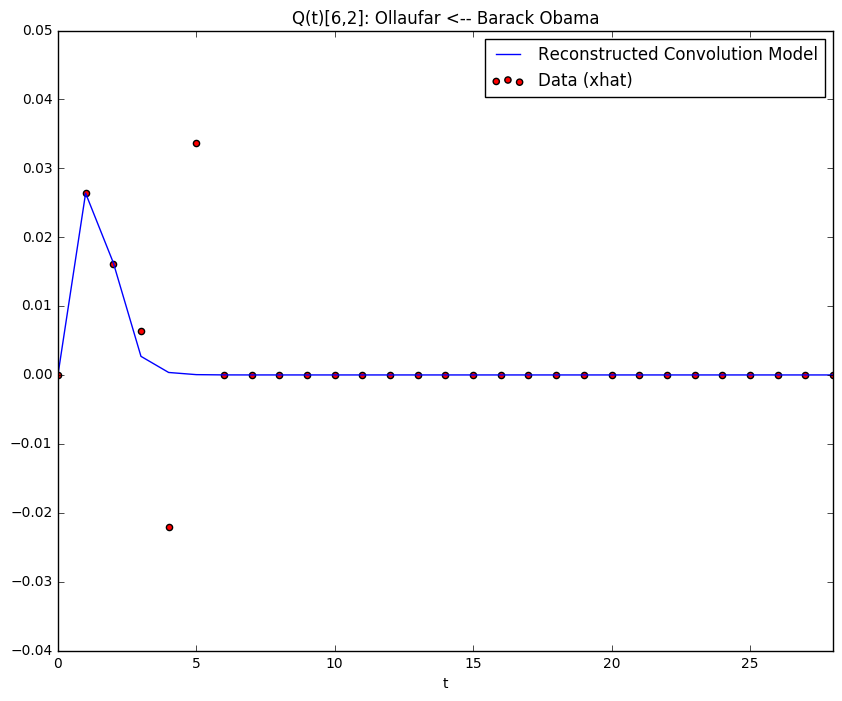

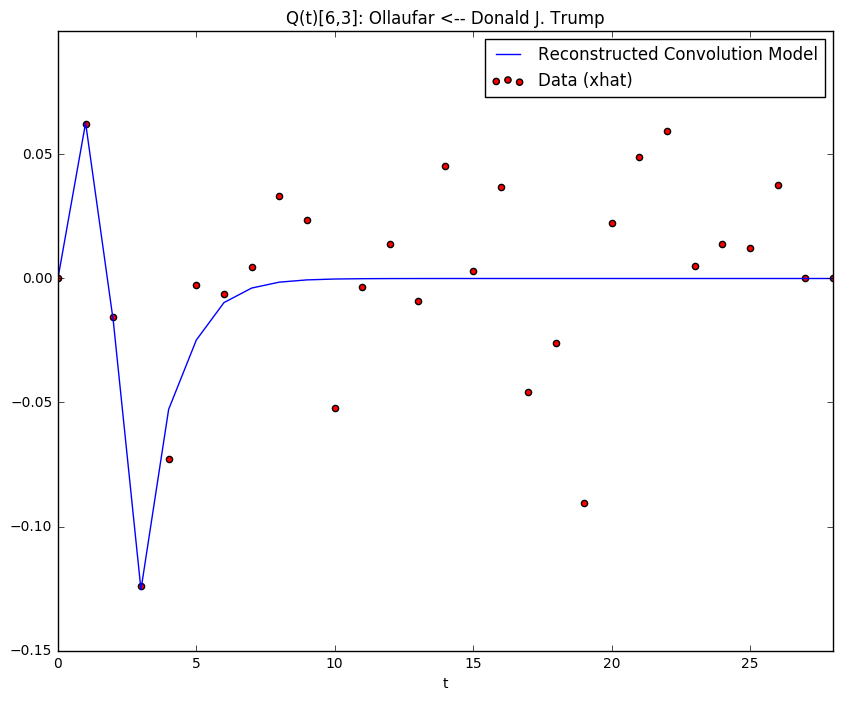

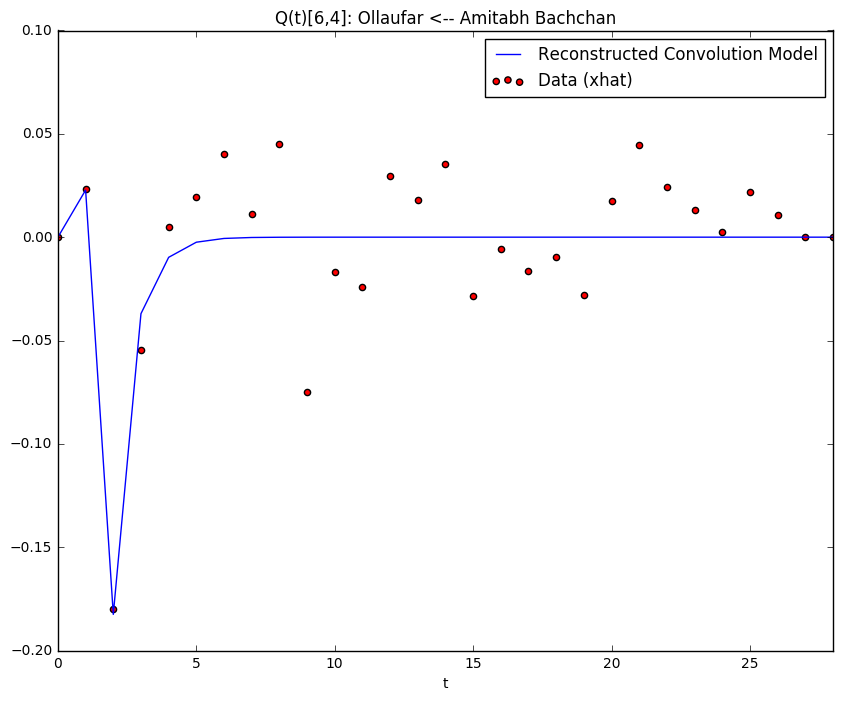

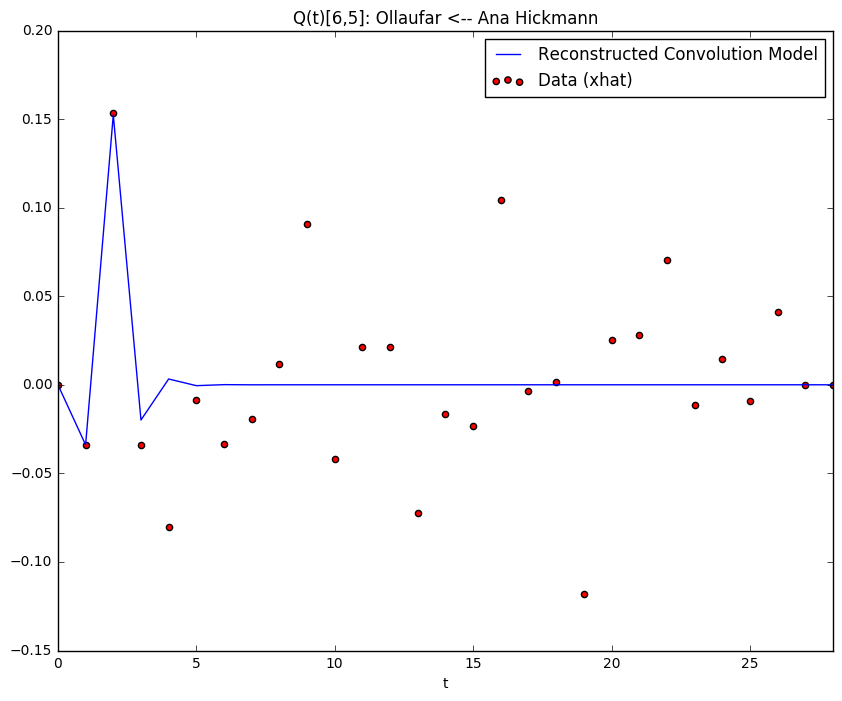

In [7]:
%matplotlib inline
df = pd.read_csv('twitter_data.csv', index_col=0, parse_dates=True)

cols = df.columns
cols = np.random.choice(cols, n, replace=False)
# cols = ['Donald J. Trump', 'Barack Obama', 'Justin Bieber']

y = df[cols]
R = len(y)

titles = {i + 1: person for i, person in enumerate(cols)}

recon = Reconstructor(debug=True, r=R, max_iterations=1000, bounds=bounds, order=order, robust=False)
rs = recon.unmeasured(y.values, plot=True, titles=titles)

flat = []
for key, vals in rs.items():
    for k2, lst in vals.items():
        flat.append(list(lst))

In [8]:
subs = [' '.join([str(item) for item in sub]) for sub in flat]
arr = ' ; '.join(subs)
colstrs = ['\'{}\''.format(item) for item in cols]
print('vulnerabilities([{}], {{{}}});'.format(arr, ', '.join(colstrs)))

vulnerabilities([-3.57439658397 -0.320565256911 -9.79308047331 0.060341619566 9.90015520258 -0.126866167778 2.94201018082 0.231666691252 ; 1.96558251011 0.191143432022 3.92455739998 0.381401973138 -3.95512307294 -0.120966060645 -5.34073302537 0.335307584548 ; -6.58413082621 -0.671520301864 -4.76935880522 -0.37350238047 -1.44500341711 0.252275344023 9.63862562026 -0.610801655636 ; 3.04734919493 -0.322096834995 0.547494511008 0.55689946414 -9.8354813665 -0.581749657631 7.59157257179 -0.626487763253 ; -10.0 0.136209865125 -3.58499986751 -0.250897107925 5.80329347706 0.286336931648 10.0 -0.0976604695534 ; 3.09673498384 0.286501059311 -7.49974878486 0.182660635663 -8.41444189561 -0.0361814564599 4.47290041211 0.0398439944274 ; 9.67579645265 0.0417271469735 -1.65290145266 0.204061526272 1.20374700128 -0.228299265614 4.30401508289 0.0387778987132 ; 1.44457109684 0.138791783599 1.2145196457 0.155622897864 2.48449330592 -0.111033154527 -0.5038388922 0.293597830479 ; -0.519903787206 -0.280845380

In [ ]:
recon = Reconstructor(debug=True, r=R, max_iterations=1000, bounds=bounds, order=order, robust=True)
rs = recon.unmeasured(y.values, plot=False, titles=titles)

flat = []
for key, vals in rs.items():
    for k2, lst in vals.items():
        flat.append(list(lst))

In [ ]:
subs = [' '.join([str(item) for item in sub]) for sub in flat]
arr = ' ; '.join(subs)
colstrs = ['\'{}\''.format(item) for item in cols]
print('vulnerabilities([{}], {{{}}});'.format(arr, ', '.join(colstrs)))